# Setup

In [1]:
sys.path.append('C:/Users/schick/General/git/')

%load_ext autoreload
%autoreload 2

import scipy.constants as constants
import numericalunits as u
u.reset_units('SI')

In [2]:
import udkm1Dsimpy as ud

# Init atom

In [3]:
Dy = ud.atom('Dy', ID='dy123')
print(Dy)

en = 8047*u.eV
qz = 1*u.angstrom**-1

print(Dy.getAtomicFormFactor(en))
print(Dy.getCMAtomicFormFactor(en,qz))

Atom with the following properties
ID                 : dy123
symbol             : Dy
name               : Dysprosium
atomic number Z    : 66.00
mass number   A    : 162.50 u
mass               : 2.70e-25 kg
ionicity           : 0.00
Cromer Mann coeff  : [  66.          0.         26.507      17.6383     14.5596      2.96577
    2.1802      0.202172   12.1899    111.874       4.29728 ]

(56.21975267348373-9.926811669658886j)
(50.0432210641-9.92681166966j)


In [4]:
Tb = ud.atom('Tb')
print(Tb)

print(Tb.getAtomicFormFactor(en))
print(Tb.getCMAtomicFormFactor(en,qz))

Atom with the following properties
ID                 : Tb
symbol             : Tb
name               : Terbium
atomic number Z    : 65.00
mass number   A    : 158.93 u
mass               : 2.64e-25 kg
ionicity           : 0.00
Cromer Mann coeff  : [  65.          0.         25.8976     18.2185     14.3167      2.95354
    2.24256     0.196143   12.6648    115.362       3.58324 ]

(55.833947084536725-9.205449111700881j)
(49.8350093997-9.2054491117j)


# Init mixedAtom

In [5]:
DyTb = ud.atomMixed('DyTb', name='some alloy', ID='123213')

# print(dyTb)

DyTb.name

DyTb.addAtom(Dy, 0.4)
DyTb.addAtom(Tb, 0.6)

print(DyTb)
print(DyTb.getAtomicFormFactor(en))
print(DyTb.getCMAtomicFormFactor(en,qz))

Atom with the following properties
ID                 : 123213
symbol             : DyTb
name               : some alloy
atomic number Z    : 65.40
mass number   A    : 160.36 u
mass               : 2.66e-25 kg
ionicity           : 0.00
Cromer Mann coeff  : []
2 Constituents:
	 Dysprosium 	 40.00%
	 Terbium 	 60.00%

(55.98826932011553-9.493994134884083j)
(49.9182940654-9.49399413488j)


# Init unitCell

In [8]:
uc = ud.unitCell('uc', 'Unit Cell', 3*u.angstrom, heatCapacity=10*(u.J/u.kg/u.K), 
                 linThermExp=1e-6/u.K, thermCond=1*(u.W/u.m/u.K), 
                 optPenDepth=10*u.nm, soundVel=5*(u.nm/u.ps))
uc.addAtom(Dy, 'lambda strain: 0*(strain+1)')
uc.addAtom(Dy, 'lambda strain: 0.25*(strain+1)')
uc.addAtom(Tb, 0.5)
uc.addAtom(Tb, 0.75)
print(uc)

Unit Cell with the following properties
ID                     : uc
name                   : Unit Cell
a-axis                 : 3.00 Å
b-axis                 : 3.00 Å
c-axis                 : 3.00 Å
area                   : 9.00 Å²
volume                 : 27.00 Å³
mass                   : 1.19e-25 kg
density                : 3.95e+04 kg/m³
Debye Waller Factor    : 0.00 m²
sound velocity         : 5.00 nm/ps
spring constant        : [ 32.] kg/s²
phonon damping         : 0.00 kg/s
opt. pen. depth        : 10.00 nm
opt. refractive index  : 0.00
opt. ref. index/strain : 0.00
thermal conduct. [W/m K]       :
			 lambda T: 1.000000
linear thermal expansion [1/K] :
			 lambda T: 0.000001
heat capacity [J/kg K]         :
			 lambda T: 10.000000
subsystem coupling [W/m^3]     :
			 lambda T: 0.000000
4 Constituents:
Dysprosium 	 0.00 	 lambda strain: 0*(strain+1)
Dysprosium 	 0.25 	 lambda strain: 0.25*(strain+1)
Terbium 	 0.50 	 lambda strain: 5.000000e-01*(strain+1)
Terbium 	 0.75 	 lambda s

<IPython.core.display.Javascript object>


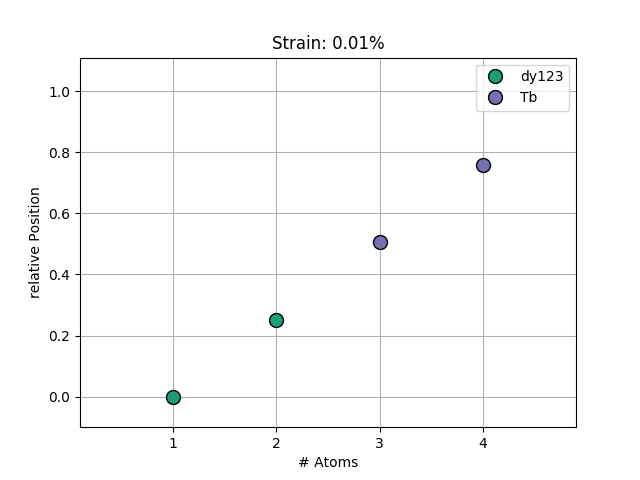

In [9]:
uc.visualize(strains=0.01)

## 2T-Model unitCell

In [28]:
params = {
    'heatCapacity'      : ['lambda T: 30*T**3 + 10*T**2', 10*(u.J/u.kg/u.K)],
    'linThermExp'       : [1, 1e-6/u.K],
    'thermCond'         : [2, 1*(u.W/u.m/u.K)],
    'subSystemCoupling' : ['lambda T: 5*(T[0]-T[1])', 'lambda T: -5*(T[0]-T[1])'],
    'optPenDepth'       : 10*u.nm,
    'soundVel'          : 5*(u.nm/u.ps),
}


uc = ud.unitCell('uc', 'Unit Cell', 3*u.angstrom, **params)
uc.addAtom(Dy, 'lambda strain: 0*(strain+1)')
uc.addAtom(Dy, 'lambda strain: 0.25*(strain+1)')
uc.addAtom(Tb, 0.5)
uc.addAtom(Tb, 0.75)
print(uc)

ValueError: Heat capacity, thermal conductivity, linearthermal expansion and subsystem coupling have not the same number of elements!